<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/COVID_19_Projections_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [66]:
print('Welcome to the COVID-19_Projections Statistics')
print('')
print('Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.')
userinput = input('Please put state here:')

Welcome to the COVID-19_Projections Statistics

Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.
Please put state here:FL


**Framework for Cases and Deaths from Covid_Projections**



In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [68]:
# grabbing the Data
url = 'https://github.com/youyanggu/covid19-infection-estimates-latest/raw/main/latest_all_estimates_states.csv'
df = pd.read_csv(url)

In [69]:
# indexing the data
df = df.loc[:,['date','state','total_deaths','total_infected_mean']]


In [70]:
# converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [71]:
# renaming the columns
df['Deaths'] = df['total_deaths']
df['Cases'] = df['total_infected_mean']
df = df.drop(columns=['total_deaths','total_infected_mean'])

In [72]:
# getting user input
df = df[df['state'] == userinput]

In [73]:
# making sure the data starts March 1st 
df = df[df['date'] >= '03-01-2020']
df= df[df['date']<= '02-21-2021']

In [74]:
df = df.reset_index(drop = True)

In [75]:
# creating the day column
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [76]:
df.loc[0, 'Avg day of case'] = np.nan
df.loc[0, 'Avg day of death'] = np.nan

In [77]:
if df.loc[0,'Cases'] != 0:
  df.loc[0,'Avg day of case'] = df.loc[0,'Day']

In [78]:
if df.loc[0,'Deaths'] != 0:
  df.loc[0,'Avg day of death'] = df.loc[0,'Day']

In [79]:
# calulating Average day of Case
for i in range(1,len(df)):
  if df.loc[i-1, 'Cases']!=0 and df.loc[i, 'Cases']!=0:
    x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
    df.loc[i, 'Avg day of case'] = round(x,4)
  elif df.loc[i-1, 'Cases'] ==0 and df.loc[i, 'Cases']!=0:
    x = df.loc[i, 'Day']
    df.loc[i, 'Avg day of case'] = round(x,4)
  else:
     df.loc[i, 'Avg day of case'] = np.nan


In [80]:
# calulating Average day of death
for i in range(1,len(df)):
  if df.loc[i-1, 'Deaths']!=0 and df.loc[i, 'Deaths']!=0:
    x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
    df.loc[i, 'Avg day of death'] = round(x, 4)
  elif df.loc[i-1, 'Deaths'] ==0 and df.loc[i, 'Deaths']!=0:
    x = df.loc[i, 'Day']
    df.loc[i, 'Avg day of death'] = round(x, 4)
  else:
     df.loc[i, 'Avg day of death'] = np.nan

In [81]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [82]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [83]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [84]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [85]:
# avg death day - avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [86]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [87]:
# avg death day/current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [88]:
df['Avg Case Day - Avg Death Day']= df['Avg day of case']- df['Avg day of death']

In [89]:
# converting to datetime
df.date = pd.to_datetime(df.date)

In [90]:
df = df.drop(columns='index')

In [91]:
df

,date,state,Deaths,Cases,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Case Day - Avg Death Day
0,2020-03-01,FL,0,3222.16,1.0,1.0000,NaN,0.000515413,0,NaN,1.000000,NaN,NaN
1,2020-03-02,FL,0,4089.55,2.0,1.2121,NaN,0.000654159,0,NaN,0.606050,NaN,NaN
2,2020-03-03,FL,0,5128.40,3.0,1.5743,NaN,0.000820333,0,NaN,0.524767,NaN,NaN
3,2020-03-04,FL,0,6373.94,4.0,2.0483,NaN,0.00101957,0,NaN,0.512075,NaN,NaN
4,2020-03-05,FL,0,7858.56,5.0,2.6059,NaN,0.00125705,0,NaN,0.521180,NaN,NaN
5,2020-03-06,FL,0,9611.29,6.0,3.2249,NaN,0.00153741,0,NaN,0.537483,NaN,NaN
6,2020-03-07,FL,0,11665.30,7.0,3.8896,NaN,0.00186597,0,NaN,0.555657,NaN,NaN
7,2020-03-08,FL,0,14068.10,8.0,4.5916,NaN,0.00225032,0,NaN,0.573950,NaN,NaN
8,2020-03-09,FL,0,16888.20,9.0,5.3277,NaN,0.00270142,0,NaN,0.591967,NaN,NaN
9,2020-03-10,FL,0,20172.90,10.0,6.0885,NaN,0.00322683,0,NaN,0.608850,NaN,NaN


In [92]:
pd.set_option('max_rows', 99999)

**Statistics**

In [93]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
dateofdifferDeath = df.loc[df['Avg Death Day - Avg Case Day'].idxmax(), 'date']
dateofdifferCase = df.loc[df['Avg Case Day - Avg Death Day'].idxmax(), 'date']
differCases= df['Avg Case Day - Avg Death Day'].max()
datesDeathDayGreaterThanCase = df['date'].where(df['Avg day of death']>df['Avg day of case'])

In [94]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Amount:', differDeaths,'Days',',','Day = ',dateofdifferDeath)
print('Days When Average Dates of Cases Differ By Largest Amounts')
print('Amount:',differCases,'Days',',','Day = ',dateofdifferCase)
print("The number of days per month where Average Death Day is greater than Average Case Day:")
datesDeathDayGreaterThanCase.groupby(datesDeathDayGreaterThanCase.dt.month).count()

COVID-19 STATISTICS

State =  FL
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 216.4244
Death =  226.5394
Days When Average Dates of Death Differ By Largest Amounts
Amount: 21.449299999999994 Days , Day =  2020-10-17 00:00:00
Days When Average Dates of Cases Differ By Largest Amounts
Amount: 20.33330000000001 Days , Day =  2020-07-08 00:00:00
The number of days per month where Average Death Day is greater than Average Case Day:


date
1.0      4
2.0     21
3.0     21
4.0     30
5.0     31
6.0     14
8.0     21
9.0     30
10.0    31
11.0    30
12.0    21
Name: date, dtype: int64

**Data Visualization**

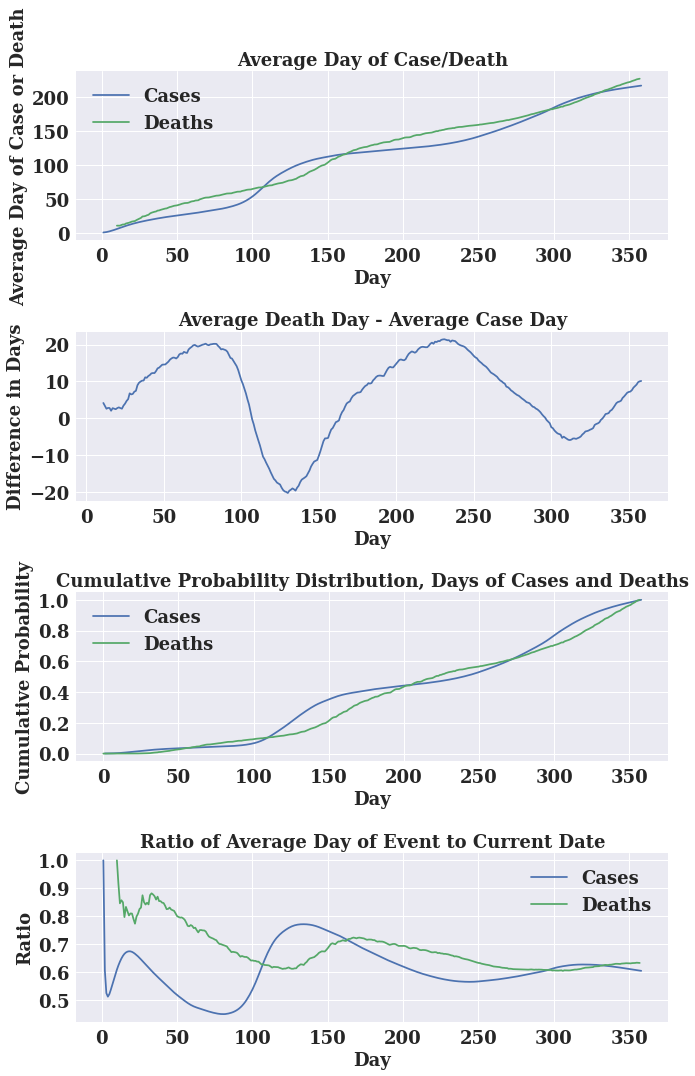

In [95]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
params = {'axes.labelsize': 18,'axes.titlesize':18, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update(params)
plt.figure(figsize = (10,15))

plt.subplot(4,1,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day of Case/Death',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Average Death Day - Average Case Day',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(4,1,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'], df['Avg Day of Death/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.legend(['Cases','Deaths'])

plt.tight_layout()
plt.style.use('seaborn')

plt.savefig("image8.png")